In [58]:
import csv
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from scipy.stats import linregress


In [2]:
colnames=['SOURCE', 'TARGET', 'RATING', 'TIME'] 
df = pd.read_csv('soc-sign-bitcoinalpha.csv.gz', names=colnames, header=None)
df.drop('RATING', axis=1) 
df['TIME'] = pd.to_datetime(df['TIME'], unit='s')
df

,SOURCE,TARGET,RATING,TIME
0,7188,1,10,2014-08-08 04:00:00
1,430,1,10,2013-08-15 04:00:00
2,3134,1,10,2013-05-28 04:00:00
3,3026,1,10,2012-10-12 04:00:00
4,3010,1,10,2012-09-17 04:00:00
...,...,...,...,...
24181,7604,7601,10,2013-03-26 04:00:00
24182,7601,7604,10,2013-03-26 04:00:00
24183,7604,7602,10,2013-03-26 04:00:00
24184,7602,7604,10,2013-03-26 04:00:00


In [3]:
df[df['TIME']=='2014-08-08 04:00:00']

,SOURCE,TARGET,RATING,TIME
0,7188,1,10,2014-08-08 04:00:00
2231,36,5,3,2014-08-08 04:00:00
3349,8,2344,1,2014-08-08 04:00:00
10856,58,321,1,2014-08-08 04:00:00


In [5]:
duplicates = df.duplicated(subset='TIME', keep=False)
duplicated_rows = df[duplicates]

In [6]:
duplicated_rows

,SOURCE,TARGET,RATING,TIME
0,7188,1,10,2014-08-08 04:00:00
1,430,1,10,2013-08-15 04:00:00
2,3134,1,10,2013-05-28 04:00:00
3,3026,1,10,2012-10-12 04:00:00
4,3010,1,10,2012-09-17 04:00:00
...,...,...,...,...
24181,7604,7601,10,2013-03-26 04:00:00
24182,7601,7604,10,2013-03-26 04:00:00
24183,7604,7602,10,2013-03-26 04:00:00
24184,7602,7604,10,2013-03-26 04:00:00


In [36]:
unique_values = df['TARGET'].unique()
print(unique_values.shape)

(3754,)


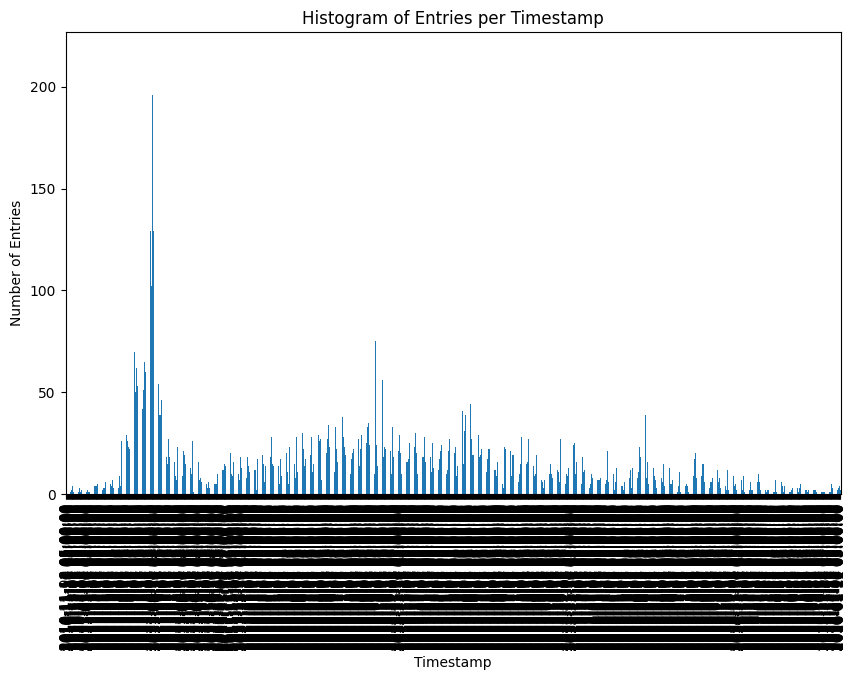

In [27]:
#df['TIME'] = pd.to_datetime(df['TIME'])

# Count the number of entries for each timestamp
entries_per_timestamp = df['TIME'].value_counts().sort_index()

# Create the histogram
plt.figure(figsize=(10, 6))
entries_per_timestamp.plot(kind='bar')
plt.xlabel('Timestamp')
plt.ylabel('Number of Entries')
plt.title('Histogram of Entries per Timestamp')
plt.show()

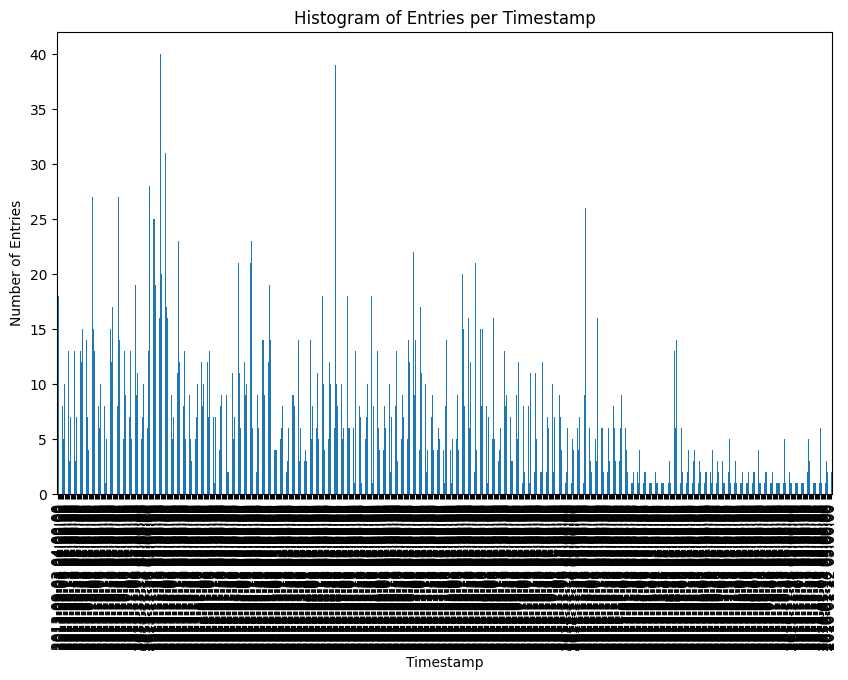

In [28]:

# Create the histogram
plt.figure(figsize=(10, 6))
entries_per_timestamp[1000:].plot(kind='bar')
plt.xlabel('Timestamp')
plt.ylabel('Number of Entries')
plt.title('Histogram of Entries per Timestamp')
plt.show()

In [21]:
entries_per_timestamp

2010-11-08 05:00:00    4
2010-11-10 05:00:00    5
2010-11-11 05:00:00    1
2010-11-12 05:00:00    5
2010-11-13 05:00:00    2
                      ..
2016-01-14 05:00:00    3
2016-01-15 05:00:00    2
2016-01-16 05:00:00    4
2016-01-17 05:00:00    1
2016-01-22 05:00:00    2
Name: TIME, Length: 1647, dtype: int64

In [34]:
np.mean(entries_per_timestamp[1000:])

7.077279752704792

In [33]:
np.std(entries_per_timestamp[1000:])

6.149368976858244

In [54]:
G = nx.Graph()

In [55]:
edgesnew = [(x, y) for x, y in edges]

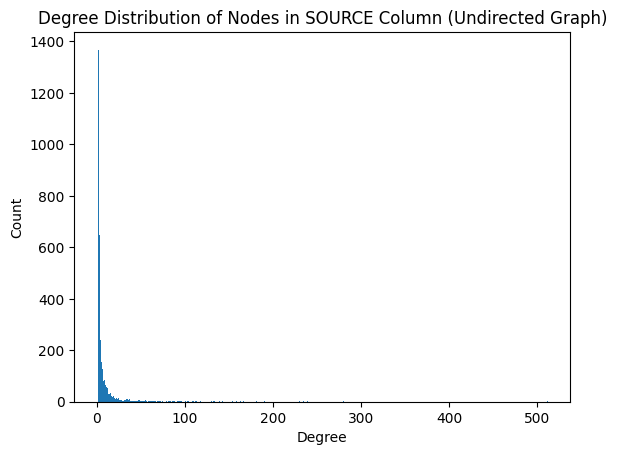

In [56]:
#edges = df[['SOURCE', 'TARGET']].values.tolist()

# Add edges to the graph
G.add_edges_from(edgesnew)

# Calculate the degree of each node in the 'SOURCE' column
degree_distribution = dict(G.degree())


# Create a histogram of the degree distribution
plt.hist(degree_distribution.values(), bins=range(max(degree_distribution.values()) + 2))
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution of Nodes in SOURCE Column (Undirected Graph)')
plt.show()

In [71]:
x = np.array(list(degree_distribution.keys()))
y = np.array(list(degree_distribution.values()))



In [72]:
x_delta = np.delete(x, np.argwhere(y==0))
y_delta = np.delete(y, np.argwhere(y==0))


xlog = np.log10(x_delta)
ylog = np.log10(y_delta)

In [84]:
# Linear regression (slope is the exponent)
slope_delta, intercept_delta, r_value_delta, _, _ = linregress(xlog, ylog)

# Regression line
y_fit_delta = 10**intercept_delta * x_delta**(slope_delta)
#y_analytic_delta = x_delta**(-3)
y_analytic_delta = 1/ np.power(x_delta, 3)

print('The power law exponent of the degree distribution using a delta fitness distribution is %s'% np.round(-slope_delta, 3))


The power law exponent of the degree distribution using a delta fitness distribution is 0.814


C:\Users\Souvik Chakraborty\AppData\Local\Temp\ipykernel_21380\3720276502.py:7: RuntimeWarning: divide by zero encountered in divide
  y_analytic_delta = 1/ np.power(x_delta, 3)


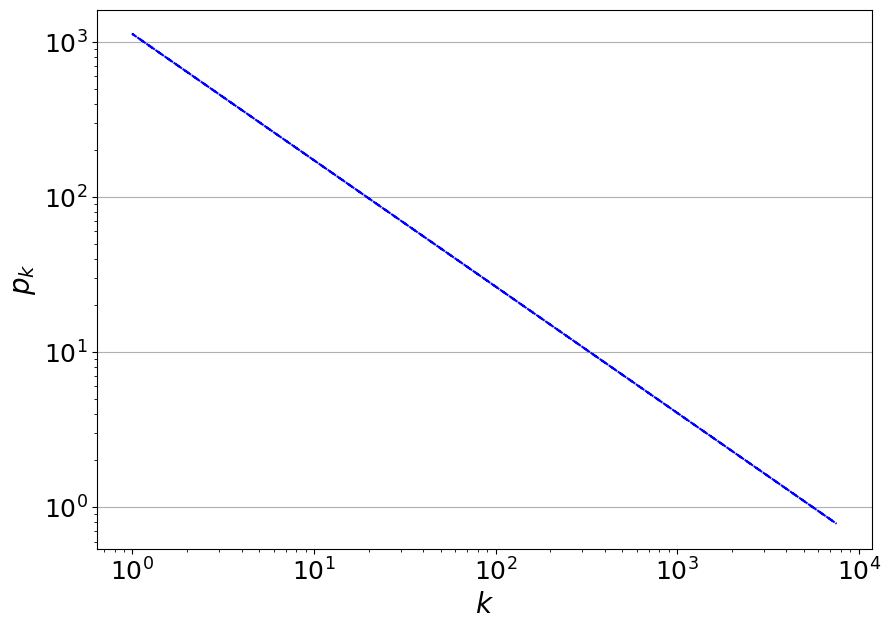

In [97]:
# Plot of the degree distribution
plt.figure(figsize=(10, 7))
#plt.loglog(x, y, 'bo', markersize=8)
plt.loglog(x_delta, y_fit_delta, color = 'blue', linestyle = 'dashed')
#plt.loglog(x_delta, y_analytic_delta, color = 'black', linestyle = 'dashed')

plt.xlabel('$k$', fontsize=20)
plt.ylabel('$p_k$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.grid(axis='y')
plt.show()

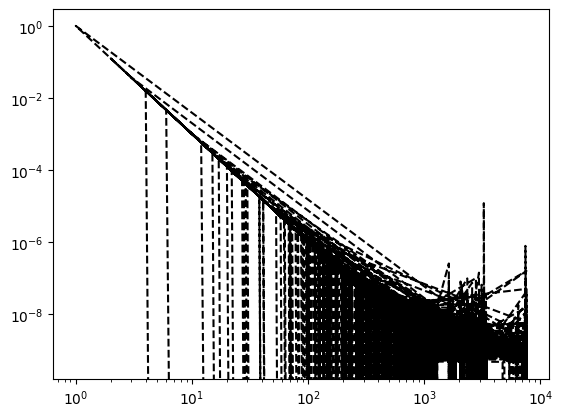